In [149]:
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [150]:
walmart_df = pd.read_csv('walmart_cleaned.csv')

# Îç∞Ïù¥ÌÑ∞Î•º ÌôïÏù∏Ìï¥Î≥¥Ïûê.
walmart_df

Unnamed: 0  Store        Date  IsHoliday  Dept  Weekly_Sales  \
0                0      1  2010-02-05          0   1.0      24924.50   
1                1      1  2010-02-05          0  26.0      11737.12   
2                2      1  2010-02-05          0  17.0      13223.76   
3                3      1  2010-02-05          0  45.0         37.44   
4                4      1  2010-02-05          0  28.0       1085.29   
...            ...    ...         ...        ...   ...           ...   
421565      423281     45  2012-10-26          0  13.0      26240.14   
421566      423282     45  2012-10-26          0  16.0       2660.02   
421567      423283     45  2012-10-26          0  32.0       4131.54   
421568      423284     45  2012-10-26          0  83.0        717.82   
421569      423285     45  2012-10-26          0  98.0       1076.80   

        Temperature  Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  \
0             42.31       2.572       0.00       0.00        0.0       0.00   
1             42.31       2.572       0.00       0.00        0.0       0.00   
2             42.31       2.572       0.00       0.00        0.0       0.00   
3             42.31       2.572       0.00       0.00        0.0       0.00   
4             42.31       2.572       0.00       0.00        0.0       0.00   
...             ...         ...        ...        ...        ...        ...   
421565        58.85       3.882    4018.91      58.08      100.0     211.94   
421566        58.85       3.882    4018.91      58.08      100.0     211.94   
421567        58.85       3.882    4018.91      58.08      100.0     211.94   
421568        58.85       3.882    4018.91      58.08      100.0     211.94   
421569        58.85       3.882    4018.91      58.08      100.0     211.94   

        MarkDown5         CPI  Unemployment  Type    Size  
0            0.00  211.096358         8.106     3  151315  
1            0.00  211.096358         8.106     3  151315  
2            0.00  211.096358         8.106     3  151315  
3            0.00  211.096358         8.106     3  151315  
4            0.00  211.096358         8.106     3  151315  
...           ...         ...           ...   ...     ...  
421565     858.33  192.308899         8.667     2  118221  
421566     858.33  192.308899         8.667     2  118221  
421567     858.33  192.308899         8.667     2  118221  
421568     858.33  192.308899         8.667     2  118221  
421569     858.33  192.308899         8.667     2  118221  

[421570 rows x 17 columns]

In [151]:
walmart_df.info()
# dateÍ∞Ä ÏãúÍ≥ÑÏó¥Ï†ÅÏù∏ ÌäπÏßïÏùÑ Í∞ÄÏßÑ Ïª¨ÎüºÏûÑÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [152]:
# date Ïª¨ÎüºÏùÑ datetime ÌòïÏãùÏúºÎ°ú Î≥ÄÌôòÌïúÎã§.
walmart_df['Date'] = pd.to_datetime(walmart_df['Date'])

In [153]:
# Î≥ÄÌôòÏù¥ Ïûò ÎêòÏóàÎã§.
walmart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Unnamed: 0    421570 non-null  int64         
 1   Store         421570 non-null  int64         
 2   Date          421570 non-null  datetime64[ns]
 3   IsHoliday     421570 non-null  int64         
 4   Dept          421570 non-null  float64       
 5   Weekly_Sales  421570 non-null  float64       
 6   Temperature   421570 non-null  float64       
 7   Fuel_Price    421570 non-null  float64       
 8   MarkDown1     421570 non-null  float64       
 9   MarkDown2     421570 non-null  float64       
 10  MarkDown3     421570 non-null  float64       
 11  MarkDown4     421570 non-null  float64       
 12  MarkDown5     421570 non-null  float64       
 13  CPI           421570 non-null  float64       
 14  Unemployment  421570 non-null  float64       
 15  Type          421

In [154]:
# ÏãúÍ≥ÑÏó¥ÏùÑ Ï†ïÎ¶¨ÌïúÎã§.
walmart_df = walmart_df.sort_values(by='Date')

In [155]:
# Ïó∞ÎèÑ Ïª¨ÎüºÏùÑ ÏÉùÏÑ±ÌïúÎã§.
walmart_df['Year'] = walmart_df['Date'].dt.year

In [156]:
## ÏßëÍ≥Ñ Ïª¨Îüº Ìï®Ïàò ÏÑ§Ï†ï

def func(walmart_df):
    walmart_df_sum = {}
    # Ï£ºÍ∞Ñ Îß§Ï∂ú Ìï©Í≥Ñ Í≥ÑÏÇ∞
    walmart_df_sum['Weekly_Sales'] = walmart_df['Weekly_Sales'].sum()
    # ÌèâÍ∑† Ïò®ÎèÑ Í≥ÑÏÇ∞
    walmart_df_sum['Temperature'] = walmart_df['Temperature'].mean()
    # ÌèâÍ∑† Ïó∞Î£å Í∞ÄÍ≤© Í≥ÑÏÇ∞
    walmart_df_sum['Fuel_Price'] = walmart_df['Fuel_Price'].mean()
    # ÌèâÍ∑† ÏÜåÎπÑÏûê Î¨ºÍ∞Ä ÏßÄÏàò(CPI) Í≥ÑÏÇ∞
    walmart_df_sum['CPI'] = walmart_df['CPI'].mean()
    # ÌèâÍ∑† Ïã§ÏóÖÎ•† Í≥ÑÏÇ∞
    walmart_df_sum['Unemployment'] = walmart_df['Unemployment'].mean()
    # Í≥µÌú¥Ïùº Ïó¨Î∂Ä Í≥ÑÏÇ∞ (ÏµúÎåÄÍ∞í, Í≥µÌú¥ÏùºÏù¥ ÌïòÎÇòÎùºÎèÑ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏúºÎ©¥ 1Î°ú ÏÑ§Ï†ï)
    walmart_df_sum['IsHoliday'] = walmart_df['IsHoliday'].max()
    return pd.Series(walmart_df_sum, index=['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'IsHoliday'])

In [157]:
walmart_df_agg = walmart_df.groupby(['Year', 'Date']).apply(func).reset_index()

In [158]:
walmart_df_agg

Year       Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0    2010 2010-02-05   49750740.50    33.277942    2.717869  167.398405   
1    2010 2010-02-12   48336677.63    33.361810    2.696102  167.384138   
2    2010 2010-02-19   48276993.78    37.038310    2.673666  167.338966   
3    2010 2010-02-26   43968571.13    38.629563    2.685642  167.691019   
4    2010 2010-03-05   46871470.30    42.373998    2.731816  167.727351   
..    ...        ...           ...          ...         ...         ...   
138  2012 2012-09-28   43734899.40    68.151759    3.858245  175.919639   
139  2012 2012-10-05   47566639.31    65.456811    3.848435  175.998254   
140  2012 2012-10-12   46128514.25    57.687284    3.897425  176.123786   
141  2012 2012-10-19   45122410.57    60.152756    3.878413  176.295499   
142  2012 2012-10-26   45544116.29    60.530277    3.791086  176.182886   

     Unemployment  IsHoliday  
0        8.576731        0.0  
1        8.567309        1.0  
2        8.576351        0.0  
3        8.561375        0.0  
4        8.572689        0.0  
..            ...        ...  
138      7.225855        0.0  
139      6.942141        0.0  
140      6.952682        0.0  
141      6.948928        0.0  
142      6.943212        0.0  

[143 rows x 8 columns]

### Îß§Ï∂ú Ìä∏Î†åÎìú

Text(0.5, 1.0, '2010 ~ 2012 Îß§Ï∂ú Ìä∏Î†åÎìú')

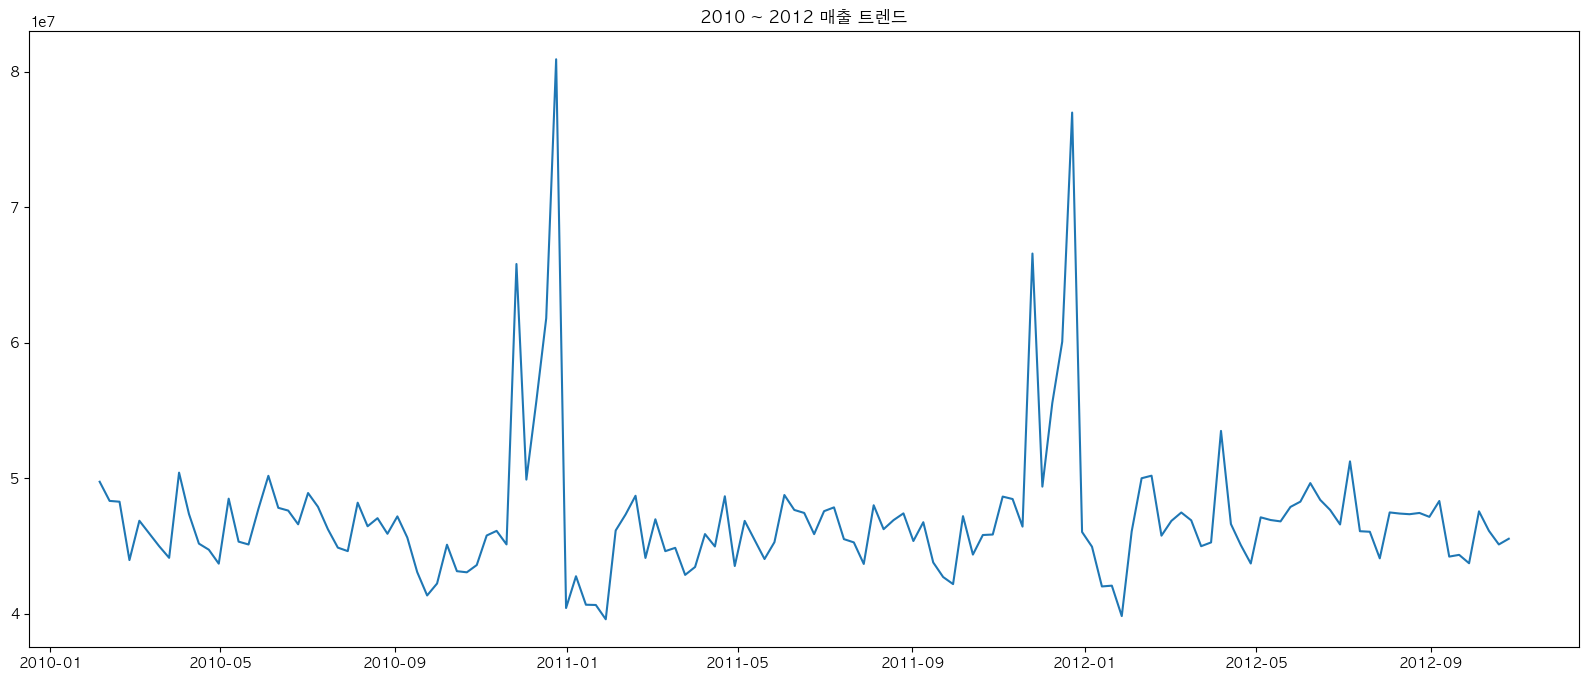

In [159]:
plt.rcParams['font.family'] = 'AppleGothic'

# Ïó∞ÎèÑÎ≥Ñ Îß§Ï∂ú Ìä∏Î†åÎìú
plt.figure(figsize=(20, 8))
plt.plot(walmart_df_agg.Date, walmart_df_agg.Weekly_Sales)
plt.title("2010 ~ 2012 Îß§Ï∂ú Ìä∏Î†åÎìú")

- 2011ÎÖÑ 1ÏõîÍ≥º 2012ÎÖÑ 1ÏõîÏùÑ Ï§ëÏã¨ÏúºÎ°ú Í∏âÍ≤©Ìïú Îì±ÎùΩÌè≠ÏùÑ Î≥¥Ïó¨Ï§ÄÎã§.
- Ïù¥Î≤§Ìä∏ÎÇò Í≥ÑÏ†àÏÑ±Ïù¥ Ï°¥Ïû¨ÌïòÎäî Í≤É Í∞ôÎã§.

In [160]:
# ÏãúÍ≥ÑÏó¥ Î∂ÑÌï¥
ts_decomp_Weekly_Sales = walmart_df_agg.loc[:, ['Date', 'Weekly_Sales']]
ts_decomp_Weekly_Sales.index = ts_decomp_Weekly_Sales.Date
ts_decomp_Weekly_Sales = ts_decomp_Weekly_Sales.drop('Date', axis=1)

In [161]:
# Ïõî, Ï£º, ÏùºÎ°ú ÎÇòÎà†Ï£ºÏûê.
decomp_Weekly_Sales = seasonal_decompose(ts_decomp_Weekly_Sales['Weekly_Sales'], model='additive', period=7) # 1Ï£ºÍ∏∞Î°ú

/Users/kimjukyeong/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)


<Figure size 640x480 with 0 Axes>

/Users/kimjukyeong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


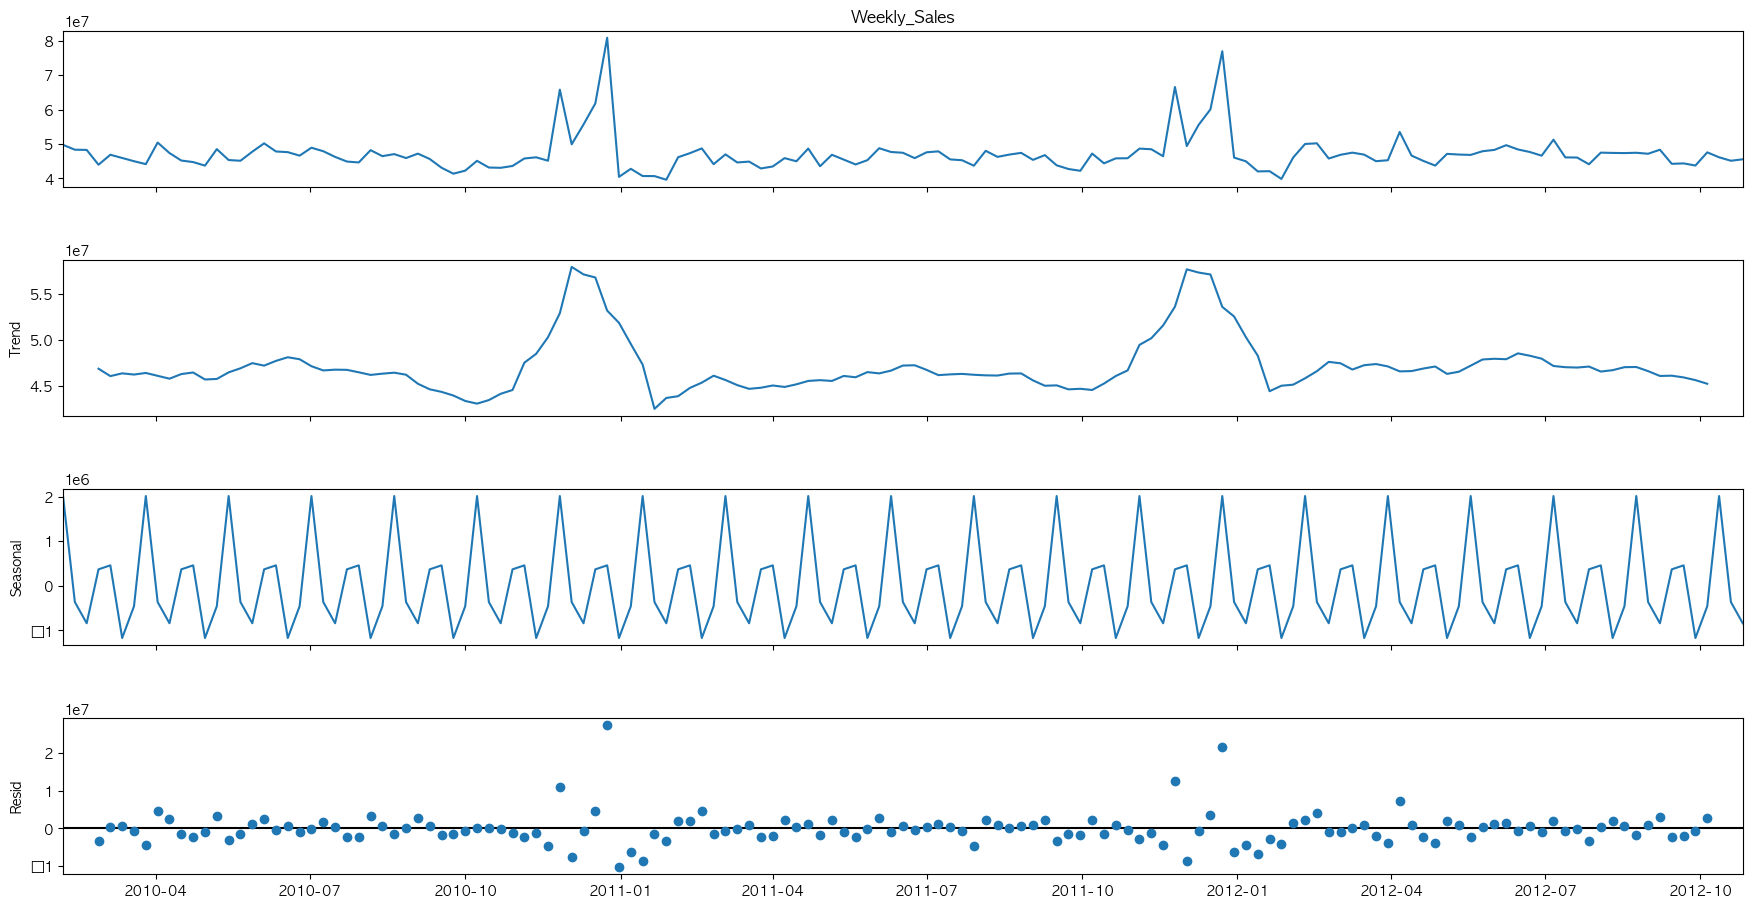

In [162]:
plt.rcParams['font.family'] = 'AppleGothic'

fig_Weekly_Sales = plt.figure()
fig_Weekly_Sales = decomp_Weekly_Sales.plot()
fig_Weekly_Sales.set_size_inches(20, 10)

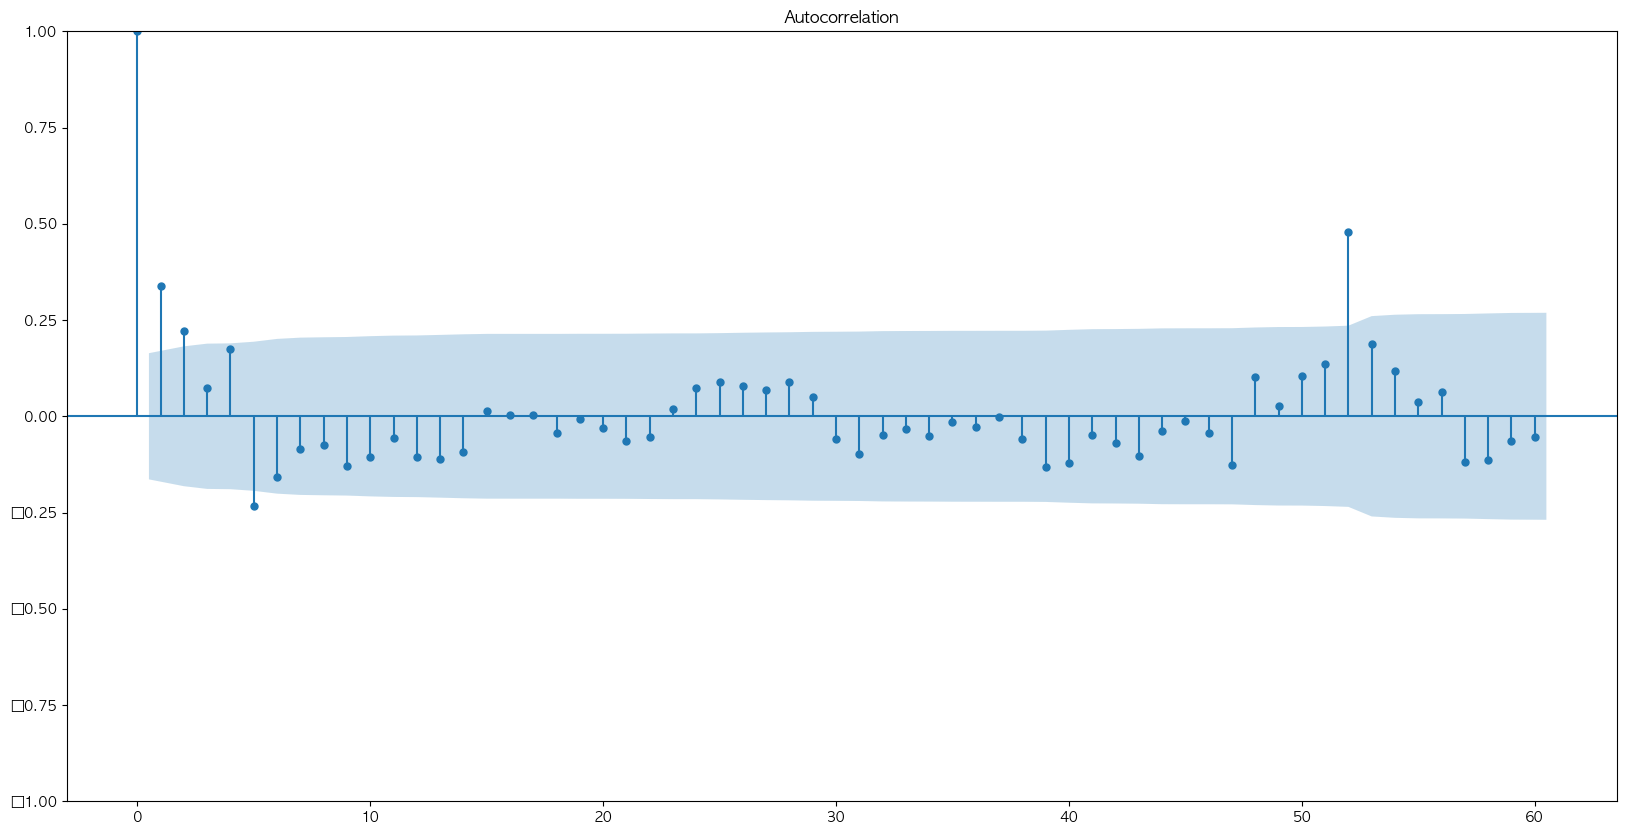

In [163]:
## ACF Í∑∏ÎûòÌîÑ
fig_Weekly_Sales = plt.figure(figsize=(20, 10))
ax1_Weekly_Sales = fig_Weekly_Sales.add_subplot(111)
fig_Weekly_Sales = sm.graphics.tsa.plot_acf(ts_decomp_Weekly_Sales, lags=60, ax = ax1_Weekly_Sales)

/Users/kimjukyeong/Library/Python/3.11/lib/python/site-packages/IPython/core/events.py:93: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/Users/kimjukyeong/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


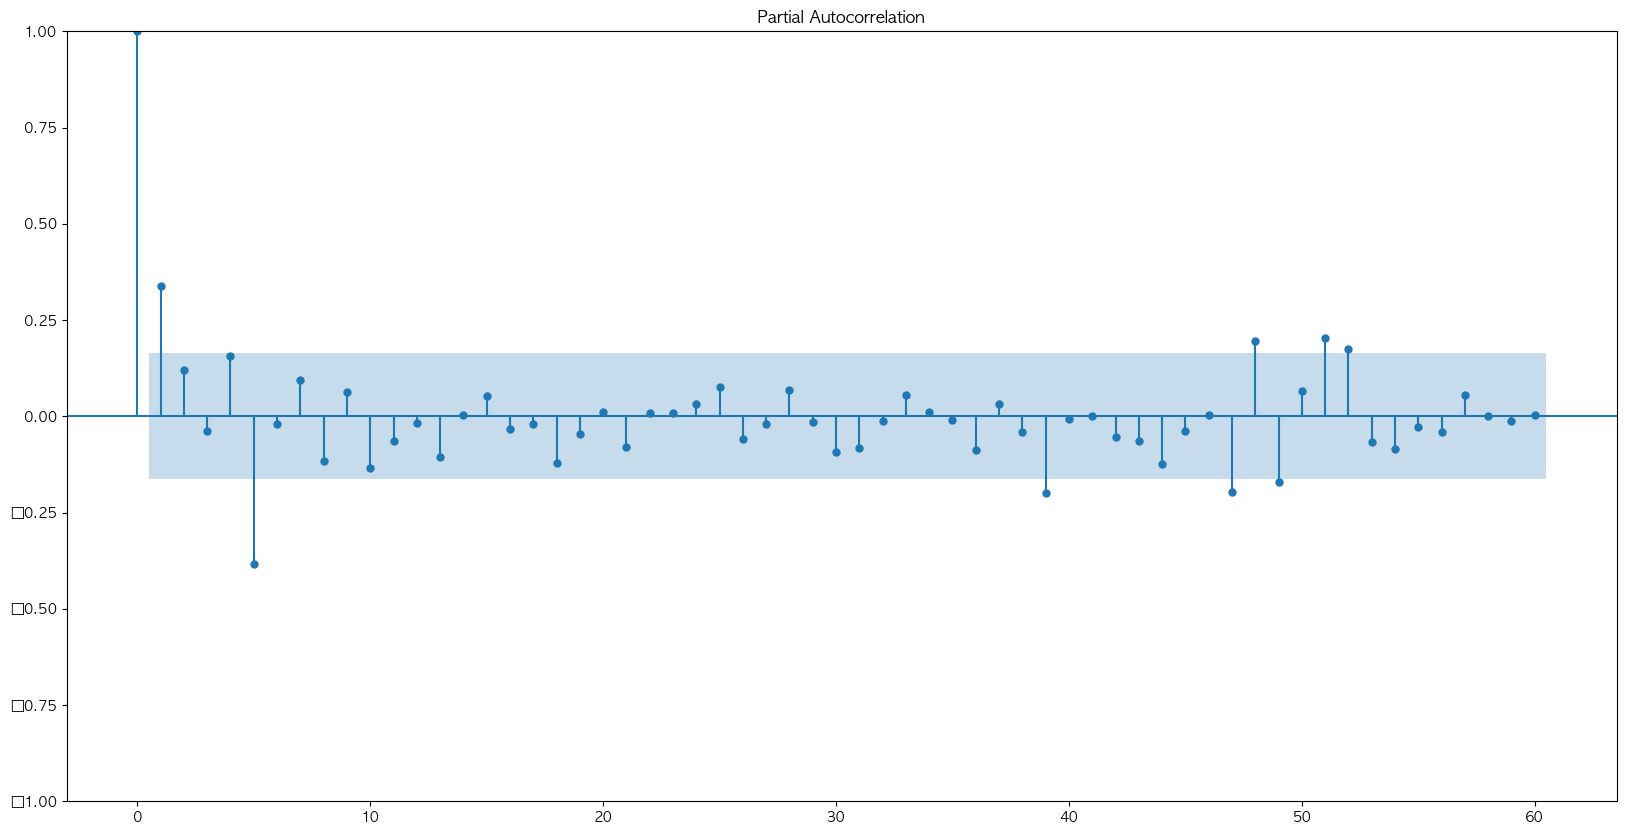

In [164]:
## PACF Í∑∏ÎûòÌîÑ
fig_Weekly_Sales = plt.figure(figsize=(20, 10))
ax1_Weekly_Sales = fig_Weekly_Sales.add_subplot(111)
fig_Weekly_Sales = sm.graphics.tsa.plot_pacf(ts_decomp_Weekly_Sales, lags=60, ax = ax1_Weekly_Sales)

## 1. ÏÑ†ÌòïÌöåÍ∑ÄÎ°ú ÏòàÏ∏°

In [165]:
## shift() Ìï®ÏàòÎäî Îç∞Ïù¥ÌÑ∞Î•º ÏßÄÏ†ïÎêú Í∏∞Í∞ÑÎßåÌÅº Ïù¥ÎèôÏãúÌÇ®Îã§.
 # ÏòàÎ•º Îì§Ïñ¥, shift(1)ÏùÄ Îç∞Ïù¥ÌÑ∞Î•º 1Ìñâ ÏïÑÎûòÎ°ú Ïù¥ÎèôÏãúÌÇ§Î©∞, ÏúÑÏ™ΩÏóê Îπà Í∞í(NaN)ÏùÑ Ï±ÑÏö¥Îã§.

## Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ 1 ~ 4Ï£º Ï†Ñ Îß§Ï∂úÏï°
walmart_df_agg['Weekly_Sales_1w'] = walmart_df_agg['Weekly_Sales'].shift(1)
walmart_df_agg['Weekly_Sales_2w'] = walmart_df_agg['Weekly_Sales'].shift(2)
walmart_df_agg['Weekly_Sales_3w'] = walmart_df_agg['Weekly_Sales'].shift(3)
walmart_df_agg['Weekly_Sales_4w'] = walmart_df_agg['Weekly_Sales'].shift(4)
walmart_df_agg['Weekly_Sales_52w'] = walmart_df_agg['Weekly_Sales'].shift(52)


In [166]:
walmart_df_agg

Year       Date  Weekly_Sales  Temperature  Fuel_Price         CPI  \
0    2010 2010-02-05   49750740.50    33.277942    2.717869  167.398405   
1    2010 2010-02-12   48336677.63    33.361810    2.696102  167.384138   
2    2010 2010-02-19   48276993.78    37.038310    2.673666  167.338966   
3    2010 2010-02-26   43968571.13    38.629563    2.685642  167.691019   
4    2010 2010-03-05   46871470.30    42.373998    2.731816  167.727351   
..    ...        ...           ...          ...         ...         ...   
138  2012 2012-09-28   43734899.40    68.151759    3.858245  175.919639   
139  2012 2012-10-05   47566639.31    65.456811    3.848435  175.998254   
140  2012 2012-10-12   46128514.25    57.687284    3.897425  176.123786   
141  2012 2012-10-19   45122410.57    60.152756    3.878413  176.295499   
142  2012 2012-10-26   45544116.29    60.530277    3.791086  176.182886   

     Unemployment  IsHoliday  Weekly_Sales_1w  Weekly_Sales_2w  \
0        8.576731        0.0              NaN              NaN   
1        8.567309        1.0      49750740.50              NaN   
2        8.576351        0.0      48336677.63      49750740.50   
3        8.561375        0.0      48276993.78      48336677.63   
4        8.572689        0.0      43968571.13      48276993.78   
..            ...        ...              ...              ...   
138      7.225855        0.0      44354547.11      44226038.65   
139      6.942141        0.0      43734899.40      44354547.11   
140      6.952682        0.0      47566639.31      43734899.40   
141      6.948928        0.0      46128514.25      47566639.31   
142      6.943212        0.0      45122410.57      46128514.25   

     Weekly_Sales_3w  Weekly_Sales_4w  Weekly_Sales_52w  
0                NaN              NaN               NaN  
1                NaN              NaN               NaN  
2                NaN              NaN               NaN  
3        49750740.50              NaN               NaN  
4        48336677.63      49750740.50               NaN  
..               ...              ...               ...  
138      48330059.31      47159639.43       42195830.81  
139      44226038.65      48330059.31       47211688.36  
140      44354547.11      44226038.65       44374820.30  
141      43734899.40      44354547.11       45818953.44  
142      47566639.31      43734899.40       45855821.05  

[143 rows x 13 columns]

In [167]:
## Î™®Îç∏Ïùò ÌïôÏäµÏùÑ ÏúÑÌï¥ Í∏∞Í∞ÑÏùÑ ÏÑ§Ï†ï
walmart_df_agg_set = walmart_df_agg[walmart_df_agg['Date'].isin(pd.date_range('2010-02-05', '2012-10-26'))]

In [168]:
# NaN Í∞íÏùÑ Ìè¨Ìï®ÌïòÎäî Ìñâ ÏÇ≠Ï†ú
walmart_df_agg_set = walmart_df_agg_set.dropna()

In [169]:
walmart_df_agg.columns

Index(['Year', 'Date', 'Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI',
       'Unemployment', 'IsHoliday', 'Weekly_Sales_1w', 'Weekly_Sales_2w',
       'Weekly_Sales_3w', 'Weekly_Sales_4w', 'Weekly_Sales_52w'],
      dtype='object')

In [170]:
## ÎèÖÎ¶ΩÎ≥ÄÏàòÏôÄ Ï¢ÖÏÜçÎ≥ÄÏàòÎ•º Î∂ÑÎ¶¨ÌïúÎã§.
df_x = walmart_df_agg_set.drop(['Year', 'Date', 'Weekly_Sales'], axis=1)
df_y = walmart_df_agg_set['Weekly_Sales']

In [171]:
df_x

Temperature  Fuel_Price         CPI  Unemployment  IsHoliday  \
52     29.807584    3.136416  168.894550      8.237056        0.0   
53     31.445705    3.163657  169.106782      8.233422        1.0   
54     45.219606    3.183584  169.234229      8.244219        0.0   
55     42.344853    3.213339  169.490884      8.243163        0.0   
56     43.982755    3.394307  169.618032      8.242732        0.0   
..           ...         ...         ...           ...        ...   
138    68.151759    3.858245  175.919639      7.225855        0.0   
139    65.456811    3.848435  175.998254      6.942141        0.0   
140    57.687284    3.897425  176.123786      6.952682        0.0   
141    60.152756    3.878413  176.295499      6.948928        0.0   
142    60.530277    3.791086  176.182886      6.943212        0.0   

     Weekly_Sales_1w  Weekly_Sales_2w  Weekly_Sales_3w  Weekly_Sales_4w  \
52       39599852.99      40654648.03      40673678.04      42775787.77   
53       46153111.12      39599852.99      40654648.03      40673678.04   
54       47336192.79      46153111.12      39599852.99      40654648.03   
55       48716164.12      47336192.79      46153111.12      39599852.99   
56       44125859.84      48716164.12      47336192.79      46153111.12   
..               ...              ...              ...              ...   
138      44354547.11      44226038.65      48330059.31      47159639.43   
139      43734899.40      44354547.11      44226038.65      48330059.31   
140      47566639.31      43734899.40      44354547.11      44226038.65   
141      46128514.25      47566639.31      43734899.40      44354547.11   
142      45122410.57      46128514.25      47566639.31      43734899.40   

     Weekly_Sales_52w  
52        49750740.50  
53        48336677.63  
54        48276993.78  
55        43968571.13  
56        46871470.30  
..                ...  
138       42195830.81  
139       47211688.36  
140       44374820.30  
141       45818953.44  
142       45855821.05  

[91 rows x 10 columns]

In [172]:
df_y

52     46153111.12
53     47336192.79
54     48716164.12
55     44125859.84
56     46980603.74
          ...     
138    43734899.40
139    47566639.31
140    46128514.25
141    45122410.57
142    45544116.29
Name: Weekly_Sales, Length: 91, dtype: float64

In [173]:
## train, test Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÎÇòÎààÎã§.
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=111)
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏÖã (X_train, y_train) : Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§ÎäîÎç∞ ÏÇ¨Ïö©, Î™®Îç∞Ïùº Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÌÜµÌï¥ Ìå®ÌÑ¥ÏùÑ ÌïôÏäµ
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ ÏÖã (X_test, y_test) : ÌïôÏäµÎêú Î™®Îç∏ÏùÑ ÌèâÍ∞ÄÌïòÎäîÎç∞ ÏÇ¨Ïö©, ÌïôÏäµÎêú Î™®Îç∏Ïù¥ ÏÉàÎ°úÏö¥ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄÎ•º ÌèâÍ∞Ä
# 'test_size = 0.2' : ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùò ÎπÑÏú®ÏùÑ 0.2Î°ú ÏÑ§Ï†ï (80% ÌïôÏäµ, 20% ÌÖåÏä§Ìä∏)
# 'random_state = 111' : ÎÇúÏàò ÏãúÎìúÎ•º 111Î°ú ÏÑ§Ï†ï (ÎÇúÏàò ÏãúÎìúÎ•º ÏÑ§Ï†ïÌïòÎ©¥ Ìï≠ÏÉÅ ÎèôÏùºÌïú Í≤∞Í≥ºÎ•º ÏñªÏùÑ Ïàò ÏûàÏùå)

#### Î™®Îç∏ ÌïôÏäµÌïòÍ∏∞

In [174]:
# LinearRegressionÏùÄ Scikit-Learn ÎùºÏù¥Î∏åÎü¨Î¶¨ÏóêÏÑú Ï†úÍ≥µÌïòÎäî ÏÑ†Ìòï ÌöåÍ∑Ä Î™®Îç∏
# fit_intercept=TrueÎäî Î™®Îç∏Ïù¥ Ï†àÌé∏(intercept)ÏùÑ ÌïôÏäµÌïòÎèÑÎ°ù ÏÑ§Ï†ï
 # ÌöåÍ∑Ä Î™®Îç∏Ïùò ÏãùÏùÄ ùë¶ = ùõΩ_0 + (ùõΩ_1 * ùë•_1) + (ùõΩ_2 * ùë•_2) + ‚ãØ + (ùõΩ_n * ùë•_n)
  # fit_intercept = TrueÏùº Í≤ΩÏö∞, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º Ï§ëÏã¨ÏúºÎ°ú ÌöåÍ∑ÄÏÑ†ÏùÑ Ï†ÅÏ†àÌûà ÏúÑÏπòÏãúÌÇ§Í∏∞ ÏúÑÌï¥ Ï†àÌé∏ÏùÑ ÌïôÏäµ
  # fit_intercept = FalseÏùº Í≤ΩÏö∞, Ï†àÌé∏ÏùÑ ÌïôÏäµÌïòÏßÄ ÏïäÏùå(Ï†àÌé∏ÏùÑ 0ÏúºÎ°ú Í≥†Ï†ï), y = (ùõΩ_1 * ùë•_1) + (ùõΩ_2 * ùë•_2) + ‚ãØ + (ùõΩ_n * ùë•_n) ÌòïÌÉúÏùò ÌöåÍ∑ÄÏÑ†ÏùÑ ÌïôÏäµ
lr = LinearRegression(fit_intercept = True)

In [175]:
# fit Î©îÏÑúÎìúÎäî ÌïôÏäµ Îç∞Ïù¥ÌÑ∞Î•º ÏÇ¨Ïö©ÌïòÏó¨ Î™®Îç∏ÏùÑ ÌïôÏäµÏãúÌÇ§Îäî Î©îÏÑúÎìú
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)

In [176]:
len(y_predict)

19

In [177]:
len(y_test)

19

In [178]:
## Í≤∞Ï†ïÍ≥ÑÏàò Í∞íÏùÑ Ï∂úÎ†•ÌïúÎã§.
## Í≤∞Ï†ïÍ≥ÑÏàòÍ∞íÏùÄ Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏñºÎßàÎÇò Ïûò ÏòàÏ∏°ÌïòÎäîÏßÄÎ•º ÎÇòÌÉÄÎÇ¥Îäî ÏßÄÌëú.
 # 1Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÏòàÏ∏°ÌïòÎäî Î™®Îç∏
 # 0Ïóê Í∞ÄÍπåÏö∏ÏàòÎ°ù Îç∞Ïù¥ÌÑ∞Î•º Ïûò ÏòàÏ∏°ÌïòÏßÄ Î™ªÌïòÎäî Î™®Îç∏
 # ÏùåÏàòÏùº Í≤ΩÏö∞, Î™®Îç∏Ïù¥ Îç∞Ïù¥ÌÑ∞Î•º ÏóâÎßùÏúºÎ°ú ÏòàÏ∏°
print('ÌïôÏäµÏÖã R-square : {:.5f}',format(lr.score(X_train, y_train)))
print('ÌÖåÏä§Ìä∏ÏÖã R-square : {:.5f}',format(lr.score(X_test, y_test)))

ÌïôÏäµÏÖã R-square : {:.5f} 0.8081493763103673
ÌÖåÏä§Ìä∏ÏÖã R-square : {:.5f} 0.9765366969232295


In [179]:
## ADF Í≤ÄÏ†ï p-value
 # ADF Í≤ÄÏ†ïÏùÄ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅ(stationary)Ïù∏ÏßÄ Ïó¨Î∂ÄÎ•º Í≤ÄÏÇ¨ÌïòÎäî ÌÜµÍ≥ÑÏ†Å Î∞©Î≤ï Ï§ë ÌïòÎÇò
  # Ï†ïÏÉÅÏÑ±ÏùÄ ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Ïùò ÌèâÍ∑†Í≥º Î∂ÑÏÇ∞Ïù¥ ÏãúÍ∞ÑÏóê Îî∞Îùº ÏùºÏ†ïÌïú ÌäπÏÑ±ÏùÑ Í∞ÄÏßÄÎäî Í≤É

# p-value 0.05 ÎØ∏ÎßåÏù¥Î©¥ ÎåÄÎ¶ΩÍ∞ÄÏÑ§ Ï±ÑÌÉù, Ï†ïÏÉÅÏÑ± ÎßåÏ°± ÌôïÏù∏
def ADF(ts_temp): # ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º ÏûÖÎ†•ÏúºÎ°ú Î∞õÎäîÎã§. # 'res'Îäî ADF Í≤ÄÏ†ï Í≤∞Í≥ºÎ•º Ï†ÄÏû•ÌïòÎäî ÌäúÌîå
    res =adfuller(ts_temp.values, autolag='AIC')
    # ts_temp.valuesÎäî ÏûÖÎ†•Îêú ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Î•º Î∞∞Ïó¥Î°ú Î≥ÄÌôò
    # autolag='AIC'Îäî ÏµúÏ†ÅÏùò ÏßÄÏó∞ Í∏∏Ïù¥Î•º Akaike Ï†ïÎ≥¥ Í∏∞Ï§Ä(AIC)ÏùÑ ÏÇ¨Ïö©ÌïòÏó¨ ÏûêÎèôÏúºÎ°ú ÏÑ†ÌÉù
    print('ADF Test')
    print('ADF Statistic: %f' %res[0]) # ADF ÌÜµÍ≥ÑÎüâÏùÑ Ï∂úÎ†•Ìï©ÎãàÎã§. Ïù¥ Í∞íÏù¥ ÏûëÏùÑÏàòÎ°ù ÏãúÍ≥ÑÏó¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßÑÎã§Îäî Ï¶ùÍ±∞Í∞Ä Í∞ïÌï¥ÏßÑÎã§.
    print('P-value: %1.10f' %res[1]) # ÏùºÎ∞òÏ†ÅÏúºÎ°ú p-valueÍ∞Ä 0.05 ÎØ∏ÎßåÏù¥Î©¥ Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßÑÎã§Í≥† ÌåêÎã®
    print('Lag: %d' %res[2]) # ÏÇ¨Ïö©Îêú ÏßÄÏó∞ Í∏∏Ïù¥Î•º Ï∂úÎ†•
    print('Observation %d' %res[3]) # Í¥ÄÏ∏°Îêú Îç∞Ïù¥ÌÑ∞ Ìè¨Ïù∏Ìä∏Ïùò ÏàòÎ•º Ï∂úÎ†•
    print('Critical Values:') # Ïó¨Îü¨ Ïã†Î¢∞ ÏàòÏ§ÄÏóêÏÑúÏùò ÏûÑÍ≥ÑÍ∞íÏùÑ Ï∂úÎ†•ÌïúÎã§.
    # ADF ÌÜµÍ≥ÑÎüâÏù¥ Ïù¥ ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÏûëÏúºÎ©¥ Ìï¥Îãπ Ïã†Î¢∞ ÏàòÏ§ÄÏóêÏÑú Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†ïÏÉÅÏÑ±ÏùÑ Í∞ÄÏßÑÎã§Í≥† ÌåêÎã®
    for key, value in res[4].items():
        print('\t%s: %.3f' %(key, value))
        


In [181]:
#Ï†ïÏÉÅÏÑ±ÏùÑ ÌÖåÏä§Ìä∏Ìïú Í≤É p-value
ADF(ts_decomp_Weekly_Sales)

ADF Test
ADF Statistic: -5.908298
P-value: 0.0000002676
Lag: 4
Observation 138
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578


### ARIMAÎ°ú ÏòàÏ∏°ÌïòÍ∏∞

In [182]:
ts_decomp_Weekly_Sales

Weekly_Sales
Date                    
2010-02-05   49750740.50
2010-02-12   48336677.63
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
...                  ...
2012-09-28   43734899.40
2012-10-05   47566639.31
2012-10-12   46128514.25
2012-10-19   45122410.57
2012-10-26   45544116.29

[143 rows x 1 columns]

In [184]:
train = ts_decomp_Weekly_Sales.loc['2010-02-15':'2012-09-28']
test = ts_decomp_Weekly_Sales.loc['2012-10-05':'2012-10-26']

In [185]:
print(len(train))
print(len(test))

137
4


In [186]:
train

Weekly_Sales
Date                    
2010-02-19   48276993.78
2010-02-26   43968571.13
2010-03-05   46871470.30
2010-03-12   45925396.51
2010-03-19   44988974.64
...                  ...
2012-08-31   47159639.43
2012-09-07   48330059.31
2012-09-14   44226038.65
2012-09-21   44354547.11
2012-09-28   43734899.40

[137 rows x 1 columns]

In [187]:
## ARIMA Ìå®ÌÇ§ÏßÄÎ°ú ÏÇ¨Ïö©
## p, d, q: ARIMA Î™®Îç∏Ïùò ÌååÎùºÎØ∏ÌÑ∞Î•º ÏÑ§Ï†ïÌïúÎã§.
 # p: ÏûêÍ∏∞ÌöåÍ∑Ä Î∂ÄÎ∂Ñ(AR)Ïùò Ï∞®Ïàò. Ïù¥Ï†Ñ Í¥ÄÏ∏°Í∞íÏùÑ Î™á Í∞ú ÏÇ¨Ïö©Ìï†ÏßÄ Í≤∞Ï†ï
 # d: Ï∞®Î∂Ñ(I) Î∂ÄÎ∂ÑÏùò Ï∞®Ïàò. Îç∞Ïù¥ÌÑ∞Ïùò Ï∞®Î∂Ñ ÌöüÏàòÎ•º Í≤∞Ï†ïÌïòÏó¨ Ï†ïÏÉÅÏÑ±ÏùÑ ÌôïÎ≥¥
 # q: Ïù¥Îèô ÌèâÍ∑† Î∂ÄÎ∂Ñ(MA)Ïùò Ï∞®Ïàò. Ïù¥Ï†Ñ ÏòàÏ∏° Ïò§Ï∞®Î•º Î™á Í∞ú ÏÇ¨Ïö©Ìï†ÏßÄ Í≤∞Ï†ï
p,d,q = 2,0,2
ml_arima=ARIMA(train['Weekly_Sales'], order=(p,d,q))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)


In [188]:
#Î™®Îç∏ ÌïôÏäµ
ml_arima_fit=ml_arima.fit()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [189]:
#ml_arima_fit ARIMAÏóêÏÑú Ï†úÍ≥µÌïòÎäî Î©îÏÑúÎìú forecast
pred1=ml_arima_fit.forecast(steps=4)

In [190]:
pred1 = pd.Series(pred1, index= test.index)

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

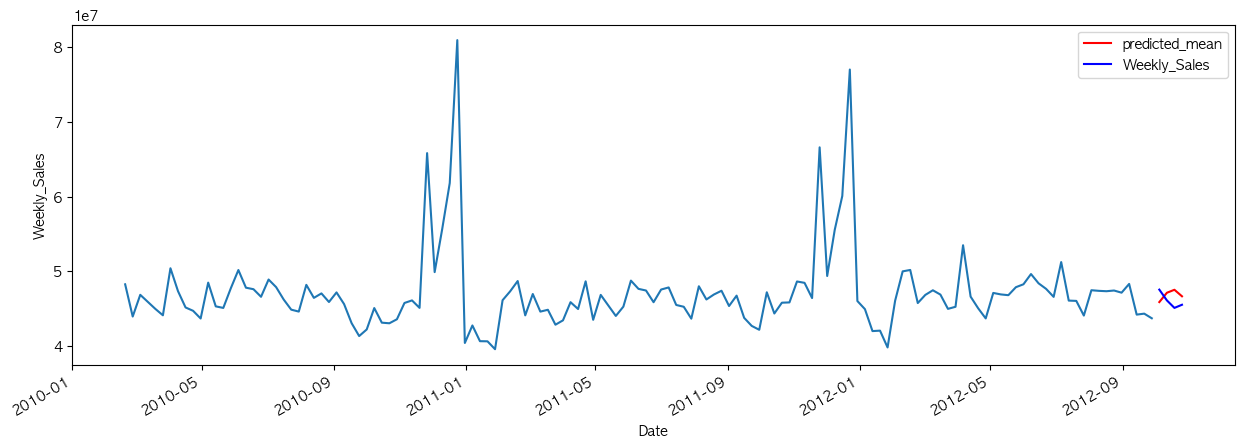

In [191]:
## Ïã§Ï†úÍ∞íÍ≥º ÏòàÏ∏°Í∞íÏóê ÎåÄÌïú ÌôïÏù∏
fig,ax = plt.subplots(figsize=(15,5))
grp = sns.lineplot(x='Date', y='Weekly_Sales',data=train)
pred1.plot(ax=ax, color='red', legend=True)
test.plot(ax=ax, color='blue', legend=True)

- Îç∞Ïù¥ÌÑ∞Í∞Ä Ïã§Ï†ú Ìå®ÌÑ¥ÏùÑ Ïû°ÏßÄ Î™ªÌïú Î∂ÄÎ∂Ñ
- Ìú¥Ïùº, Í≥ÑÏ†àÏÑ±, ÏõîÎ≥Ñ ÏßÄÏàò Îì±Ïù¥ Î∂ÑÎ™Ö Ï°¥Ïû¨

In [192]:
## Auto-Arima(Îç∞Ïù¥ÌÑ∞ÏÖã, seasonal =True ) #Í≥ÑÏ†àÏÑ±ÏùÑ Ïñ¥ÎäêÏ†ïÎèÑ Î∞òÏòÅÌï† Ïàò ÏûàÎã§.
auto_arima_ml=pm.auto_arima(train, seasonal=True, m=52)

In [193]:
#Ìå®ÌÇ§ÏßÄ ÏûêÏ≤¥ÏóêÏÑú predict ÏòàÏ∏°Í∞í 
pred2=auto_arima_ml.predict(4) 
pred2= pd.Series(pred2, index= test.index)

<Axes: xlabel='Date', ylabel='Weekly_Sales'>

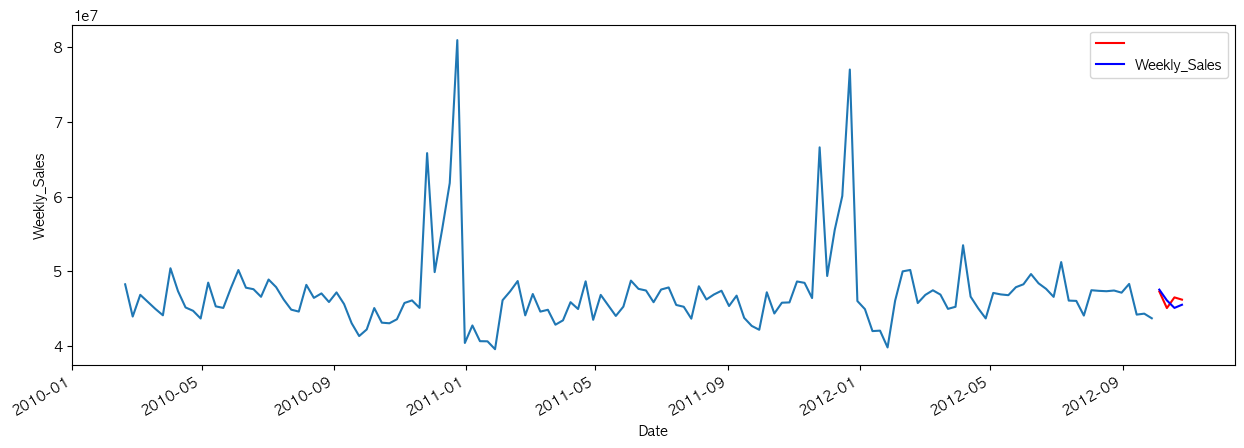

In [194]:
fig,ax = plt.subplots(figsize=(15,5))
grp = sns.lineplot(x='Date', y='Weekly_Sales',data=train)
pred2.plot(ax=ax, color='red', legend=True)
test.plot(ax=ax, color='blue', legend=True)

In [195]:
#ARIMA Î™®Îç∏Îì±Ïùò ÏöîÏïΩÌÜµÍ≥ÑÏπòÎèÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.
auto_arima_ml.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  137
Model:             SARIMAX(2, 0, 2)x(1, 0, [], 52)   Log Likelihood               -2280.271
Date:                             Sun, 21 Jul 2024   AIC                           4574.542
Time:                                     16:26:44   BIC                           4594.982
Sample:                                 02-19-2010   HQIC                          4582.848
                                      - 09-28-2012                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   3.121e+07   1.27e-08   2.46e+15      0.000    3.12e+07    3.12e+07
ar.L1         -0.8175      0.226     -3.614      0.000      -1.261      -0.374
ar.L2         -0.1658      0.352     -0.471      0.638      -0.856       0.524
ma.L1          1.2198      0.243      5.019      0.000       0.743       1.696
ma.L2          0.6297      0.238      2.644      0.008       0.163       1.096
ar.S.L52       0.6676      0.042     15.727      0.000       0.584       0.751
sigma2      2.482e+13   1.62e-14   1.54e+27      0.000    2.48e+13    2.48e+13
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               795.00
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):               0.24   Skew:                             1.98
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 8.72e+43. Standard errors may be unstable.
"""